# Financial Time-Series Forecasting Challenge

### Google Colab Environment

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To work in a Google Colab environment and use the Google GPU Engine uncomment the following cells

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


The train and test dataset should be uploaded to Google Drive, then the drive is mounted so that the files are accessible

In [6]:
from google.colab import drive
drive.mount("/content/drive")

test = pd.read_csv("/content/drive/My Drive/test.csv")
train = pd.read_csv("/content/drive/My Drive/train.csv")

Mounted at /content/drive


In [8]:
train.head()

,w,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,0.483130,0.790980,0.702555,0.528220,0.298746,0.025488,-0.173480,-0.245290,-0.405057,-0.371818,-0.032334,0.140554,0.390325,0.423380,0.433935,0.422138,0.562708,0.724054,0.870796,0.802751,0.769475,0.901774,0.982177,1.053321,1.161209,1.046285,0.720832,0.531725,0.212623,-0.055058,0.195018,-0.223580,-0.094476,0.415094,0.416219,0.478895,0.807062,0.920355,0.773632,0.892809,1.070225,0.954288,1.143901,1.359252,1.081061,1.364409,1.449354,1.195431,1.195992,1.165327,0.771110
1,1,1.135624,0.765286,0.604512,0.414197,0.241638,0.181862,-0.031920,-0.070617,-0.185980,-0.188546,0.275131,0.590515,0.735936,1.082675,1.106204,1.156080,1.238652,0.824779,0.543626,0.106370,0.124514,-0.158819,-0.095093,-0.040372,0.147434,0.439599,0.715045,1.065298,1.253656,1.228927,1.264133,1.125588,0.952086,0.901148,0.494685,0.460681,0.390435,0.423011,0.532402,0.385717,0.599606,0.561545,0.678086,0.848950,1.133852,1.041396,1.242806,1.248121,1.331348,1.267123,1.292718
2,1,0.686081,0.702834,0.637708,0.798416,0.755065,0.705225,0.535391,0.613129,0.549732,0.472387,0.431216,0.388098,0.136963,0.159388,0.182013,0.079372,0.215777,0.188945,0.093792,0.526586,0.614188,0.640183,0.964396,0.989152,1.248713,1.144618,0.946960,0.940729,0.680542,0.375531,0.066544,-0.038222,-0.095559,0.110763,0.012040,0.398041,0.646913,1.051943,1.215543,1.423341,1.406266,1.328694,1.324254,1.272889,1.074786,0.753950,0.539693,0.402041,0.442759,0.487557,0.699007
3,1,-1.342005,0.018378,-0.097297,-0.020850,-0.083325,-0.268512,-0.486335,-0.731130,-0.924458,-0.995159,-1.352881,-0.903261,-0.982766,-0.544191,-0.129456,-0.228479,-0.147327,-0.201722,-0.137298,-0.192488,-0.292842,-0.211820,-0.296235,-0.229171,-0.371834,-0.513974,-0.854578,-1.066007,-1.246917,-1.334472,-1.279333,-1.174180,-1.017749,-0.706597,-0.556024,-0.336431,-0.300222,-0.576670,-0.411209,-0.403739,-0.604313,-0.386676,-0.357946,-0.612069,-0.698063,-0.891789,-1.127624,-1.535678,-1.490786,-1.856840,-1.441472
4,1,-0.241418,0.463120,0.665307,0.446953,0.480780,0.392500,0.309231,0.158462,0.190963,0.273600,0.198676,0.266028,0.081072,0.081875,-0.064353,-0.455680,-0.497878,-0.698136,-0.764494,-0.622500,-0.424946,-0.450938,-0.072250,-0.037033,0.092286,0.057471,0.010761,-0.004932,0.265042,0.462263,0.372700,0.663679,0.591787,0.625008,0.572981,0.526948,0.150152,0.207772,-0.021719,-0.155733,-0.292606,-0.174944,-0.529541,-0.191921,-0.258093,-0.542403,-0.414866,-0.485580,-0.768820,-0.662573,-0.211837


### Data Import & Visualization

To make this notebook's output stable across runs

In [9]:
np.random.seed(42)

*Use only without running on Google Colab*


Importing test and train dataset, using `os.getcwd()` to get current working directory and then finding the .csv(s) in the `data` subfolder

In [10]:
#test = pd.read_csv(os.getcwd()+"/data/test.csv")
#train =pd.read_csv(os.getcwd()+"/data/train.csv")

Using `.head()` to preview train and test datasets

In [11]:
train.head()

,w,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,0.483130,0.790980,0.702555,0.528220,0.298746,0.025488,-0.173480,-0.245290,-0.405057,-0.371818,-0.032334,0.140554,0.390325,0.423380,0.433935,0.422138,0.562708,0.724054,0.870796,0.802751,0.769475,0.901774,0.982177,1.053321,1.161209,1.046285,0.720832,0.531725,0.212623,-0.055058,0.195018,-0.223580,-0.094476,0.415094,0.416219,0.478895,0.807062,0.920355,0.773632,0.892809,1.070225,0.954288,1.143901,1.359252,1.081061,1.364409,1.449354,1.195431,1.195992,1.165327,0.771110
1,1,1.135624,0.765286,0.604512,0.414197,0.241638,0.181862,-0.031920,-0.070617,-0.185980,-0.188546,0.275131,0.590515,0.735936,1.082675,1.106204,1.156080,1.238652,0.824779,0.543626,0.106370,0.124514,-0.158819,-0.095093,-0.040372,0.147434,0.439599,0.715045,1.065298,1.253656,1.228927,1.264133,1.125588,0.952086,0.901148,0.494685,0.460681,0.390435,0.423011,0.532402,0.385717,0.599606,0.561545,0.678086,0.848950,1.133852,1.041396,1.242806,1.248121,1.331348,1.267123,1.292718
2,1,0.686081,0.702834,0.637708,0.798416,0.755065,0.705225,0.535391,0.613129,0.549732,0.472387,0.431216,0.388098,0.136963,0.159388,0.182013,0.079372,0.215777,0.188945,0.093792,0.526586,0.614188,0.640183,0.964396,0.989152,1.248713,1.144618,0.946960,0.940729,0.680542,0.375531,0.066544,-0.038222,-0.095559,0.110763,0.012040,0.398041,0.646913,1.051943,1.215543,1.423341,1.406266,1.328694,1.324254,1.272889,1.074786,0.753950,0.539693,0.402041,0.442759,0.487557,0.699007
3,1,-1.342005,0.018378,-0.097297,-0.020850,-0.083325,-0.268512,-0.486335,-0.731130,-0.924458,-0.995159,-1.352881,-0.903261,-0.982766,-0.544191,-0.129456,-0.228479,-0.147327,-0.201722,-0.137298,-0.192488,-0.292842,-0.211820,-0.296235,-0.229171,-0.371834,-0.513974,-0.854578,-1.066007,-1.246917,-1.334472,-1.279333,-1.174180,-1.017749,-0.706597,-0.556024,-0.336431,-0.300222,-0.576670,-0.411209,-0.403739,-0.604313,-0.386676,-0.357946,-0.612069,-0.698063,-0.891789,-1.127624,-1.535678,-1.490786,-1.856840,-1.441472
4,1,-0.241418,0.463120,0.665307,0.446953,0.480780,0.392500,0.309231,0.158462,0.190963,0.273600,0.198676,0.266028,0.081072,0.081875,-0.064353,-0.455680,-0.497878,-0.698136,-0.764494,-0.622500,-0.424946,-0.450938,-0.072250,-0.037033,0.092286,0.057471,0.010761,-0.004932,0.265042,0.462263,0.372700,0.663679,0.591787,0.625008,0.572981,0.526948,0.150152,0.207772,-0.021719,-0.155733,-0.292606,-0.174944,-0.529541,-0.191921,-0.258093,-0.542403,-0.414866,-0.485580,-0.768820,-0.662573,-0.211837


In [12]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.670595,-0.839068,-0.734415,-0.587261,-0.788800,-0.975857,-0.774088,-1.021334,-1.110286,-0.893337,-1.064826,-0.535143,-0.451747,-0.319884,-0.230023,-0.309316,-0.423359,-0.483201,-0.287368,-0.269882,-0.038282,0.093233,0.047145,-0.100288,-0.348605,-0.581721,-0.616782,-0.484339,-0.428753,-0.477449,-0.917499,-0.729484,-1.059364,-1.331153,-1.376657,-1.481712,-1.244721,-1.216135,-1.194285,-0.936693,-0.997627,-1.103794,-1.092988,-0.989165,-0.827528,-0.813729,-0.532411,-0.289483,-0.407720,-0.407505
1,0.188165,0.166410,0.321011,0.318078,0.641710,0.951932,1.170069,1.177711,0.987763,0.981345,0.651526,0.944097,0.665110,0.534558,0.575689,0.563507,0.699194,0.283708,0.277885,0.028674,-0.133431,-0.128956,0.092359,0.388095,0.327306,0.551006,0.593850,0.771223,0.583534,0.587207,0.614839,0.910459,1.191987,1.343534,1.274894,1.460262,1.289660,1.166410,0.974349,1.047257,0.743405,0.916254,0.866453,0.953677,0.716259,0.692816,0.446713,0.539733,0.279293,0.180641
2,0.886510,0.760716,0.751800,0.052198,-0.050958,-0.140734,-0.173480,0.178508,0.198187,0.357906,0.288508,0.385058,0.514924,0.439050,0.907307,1.056502,1.200835,1.038399,0.759615,0.825739,0.463751,0.156036,0.125701,0.116938,0.180331,0.330021,0.337901,0.357731,0.397525,0.600081,0.742583,1.025730,1.323599,1.438235,1.236999,0.983050,0.805176,0.403192,0.398094,0.280344,0.444142,0.492294,0.573348,0.546323,0.373874,0.699132,0.808303,1.118522,1.284887,1.541929
3,-0.187722,0.030199,-0.072558,-0.098400,-0.110795,-0.127632,-0.241193,-0.374608,-0.651771,-0.513491,-0.799969,-0.993030,-1.259195,-0.939397,-0.911043,-0.756382,-0.324765,-0.044222,-0.056141,0.057031,0.161459,-0.140535,-0.131395,-0.392840,-0.733964,-0.843351,-1.050084,-0.973848,-0.954250,-0.923576,-1.101400,-0.974370,-0.795471,-0.862259,-0.696164,-0.597515,-0.449067,-0.146809,-0.147430,-0.188590,-0.340927,-0.268253,-0.654777,-1.133722,-1.484557,-1.446644,-1.654337,-1.521009,-1.593825,-1.110684
4,0.248822,0.168815,0.260804,0.505885,0.471486,1.018661,0.971406,1.062348,0.986871,0.947982,0.593847,0.897236,0.581241,0.701187,0.726811,0.488009,0.252971,0.110300,-0.160044,-0.143630,-0.074790,-0.014761,0.166772,0.609277,0.690161,0.570915,0.410520,0.653567,0.666413,0.969931,1.175351,1.504666,1.350586,0.995956,1.154917,0.795522,0.731462,0.753015,0.842744,0.655751,0.422044,0.688196,0.382416,0.344843,0.177595,0.330549,0.595061,0.884860,1.125103,1.220779


We now drop the `w` label (as it is not useful for our model)

In [13]:
financial_train = train.drop("w", axis=1)
financial_train.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.483130,0.790980,0.702555,0.528220,0.298746,0.025488,-0.173480,-0.245290,-0.405057,-0.371818,-0.032334,0.140554,0.390325,0.423380,0.433935,0.422138,0.562708,0.724054,0.870796,0.802751,0.769475,0.901774,0.982177,1.053321,1.161209,1.046285,0.720832,0.531725,0.212623,-0.055058,0.195018,-0.223580,-0.094476,0.415094,0.416219,0.478895,0.807062,0.920355,0.773632,0.892809,1.070225,0.954288,1.143901,1.359252,1.081061,1.364409,1.449354,1.195431,1.195992,1.165327,0.771110
1,1.135624,0.765286,0.604512,0.414197,0.241638,0.181862,-0.031920,-0.070617,-0.185980,-0.188546,0.275131,0.590515,0.735936,1.082675,1.106204,1.156080,1.238652,0.824779,0.543626,0.106370,0.124514,-0.158819,-0.095093,-0.040372,0.147434,0.439599,0.715045,1.065298,1.253656,1.228927,1.264133,1.125588,0.952086,0.901148,0.494685,0.460681,0.390435,0.423011,0.532402,0.385717,0.599606,0.561545,0.678086,0.848950,1.133852,1.041396,1.242806,1.248121,1.331348,1.267123,1.292718
2,0.686081,0.702834,0.637708,0.798416,0.755065,0.705225,0.535391,0.613129,0.549732,0.472387,0.431216,0.388098,0.136963,0.159388,0.182013,0.079372,0.215777,0.188945,0.093792,0.526586,0.614188,0.640183,0.964396,0.989152,1.248713,1.144618,0.946960,0.940729,0.680542,0.375531,0.066544,-0.038222,-0.095559,0.110763,0.012040,0.398041,0.646913,1.051943,1.215543,1.423341,1.406266,1.328694,1.324254,1.272889,1.074786,0.753950,0.539693,0.402041,0.442759,0.487557,0.699007
3,-1.342005,0.018378,-0.097297,-0.020850,-0.083325,-0.268512,-0.486335,-0.731130,-0.924458,-0.995159,-1.352881,-0.903261,-0.982766,-0.544191,-0.129456,-0.228479,-0.147327,-0.201722,-0.137298,-0.192488,-0.292842,-0.211820,-0.296235,-0.229171,-0.371834,-0.513974,-0.854578,-1.066007,-1.246917,-1.334472,-1.279333,-1.174180,-1.017749,-0.706597,-0.556024,-0.336431,-0.300222,-0.576670,-0.411209,-0.403739,-0.604313,-0.386676,-0.357946,-0.612069,-0.698063,-0.891789,-1.127624,-1.535678,-1.490786,-1.856840,-1.441472
4,-0.241418,0.463120,0.665307,0.446953,0.480780,0.392500,0.309231,0.158462,0.190963,0.273600,0.198676,0.266028,0.081072,0.081875,-0.064353,-0.455680,-0.497878,-0.698136,-0.764494,-0.622500,-0.424946,-0.450938,-0.072250,-0.037033,0.092286,0.057471,0.010761,-0.004932,0.265042,0.462263,0.372700,0.663679,0.591787,0.625008,0.572981,0.526948,0.150152,0.207772,-0.021719,-0.155733,-0.292606,-0.174944,-0.529541,-0.191921,-0.258093,-0.542403,-0.414866,-0.485580,-0.768820,-0.662573,-0.211837


We now check so that for `null` values in the dataset.

We could also use `.info()` to have more information like the Dtypes of the data.

In [14]:
financial_train.isnull().values.any()
#financial_train.info()

False

We now print the mean and the standard deviation for `financial_train` and after the plot for the correlation

In [15]:
mean = np.array(financial_train.mean(axis=0))
std = np.array(financial_train.std(axis=0))
print(f"mean:\n\n{mean} \n\n std: \n\n{std}")

mean:

[0.07981056 0.01690311 0.01897392 0.02320434 0.02763826 0.03106758
 0.03990432 0.04564649 0.05125901 0.05523723 0.05998229 0.06348559
 0.06059931 0.0595254  0.05751156 0.05432058 0.04932228 0.04643498
 0.04403553 0.0406522  0.04198718 0.0409172  0.04040852 0.04092458
 0.0464065  0.04816842 0.05133673 0.05514936 0.05567795 0.05729535
 0.05941809 0.05451284 0.05246735 0.05084397 0.04789078 0.04369453
 0.04131472 0.03917703 0.03669292 0.03443982 0.0305863  0.03662203
 0.03902369 0.04360521 0.04540032 0.04947673 0.05575918 0.06071495
 0.07043613 0.07828405 0.08102811] 

 std: 

[0.91249507 0.52541053 0.52491514 0.52848951 0.53464913 0.53880475
 0.5417865  0.54870909 0.55419235 0.55770326 0.56149684 0.560994
 0.56543377 0.56992756 0.57350887 0.57712409 0.57916214 0.58666059
 0.58964479 0.5969637  0.60356411 0.60950638 0.6191625  0.62788191
 0.63977145 0.64798546 0.65465379 0.66365014 0.66996123 0.67578322
 0.68552744 0.6940925  0.70205383 0.71153066 0.71805973 0.72637984
 0.73511858 

In [16]:
corr_matrix=financial_train.corr()
corr_matrix["y"].sort_values(ascending=False)

y     1.000000
49    0.977203
48    0.944832
47    0.898601
46    0.843251
31    0.831443
30    0.828819
32    0.826190
29    0.819507
33    0.808870
28    0.802625
45    0.790237
27    0.783774
34    0.779100
26    0.765639
44    0.745744
25    0.745667
35    0.743946
24    0.726833
23    0.715419
36    0.709549
43    0.708149
22    0.701411
21    0.688972
42    0.684724
20    0.683424
37    0.683334
18    0.681082
19    0.679991
17    0.677283
16    0.673230
41    0.670157
15    0.666290
38    0.664611
40    0.658175
14    0.657419
39    0.656926
13    0.642289
12    0.626453
2     0.621057
1     0.618793
3     0.614287
0     0.613172
11    0.612443
4     0.602994
10    0.601310
5     0.589865
9     0.588522
6     0.584518
7     0.580042
8     0.579152
Name: y, dtype: float64

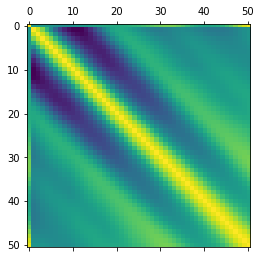

In [17]:
plt.matshow(financial_train.corr())
plt.show()

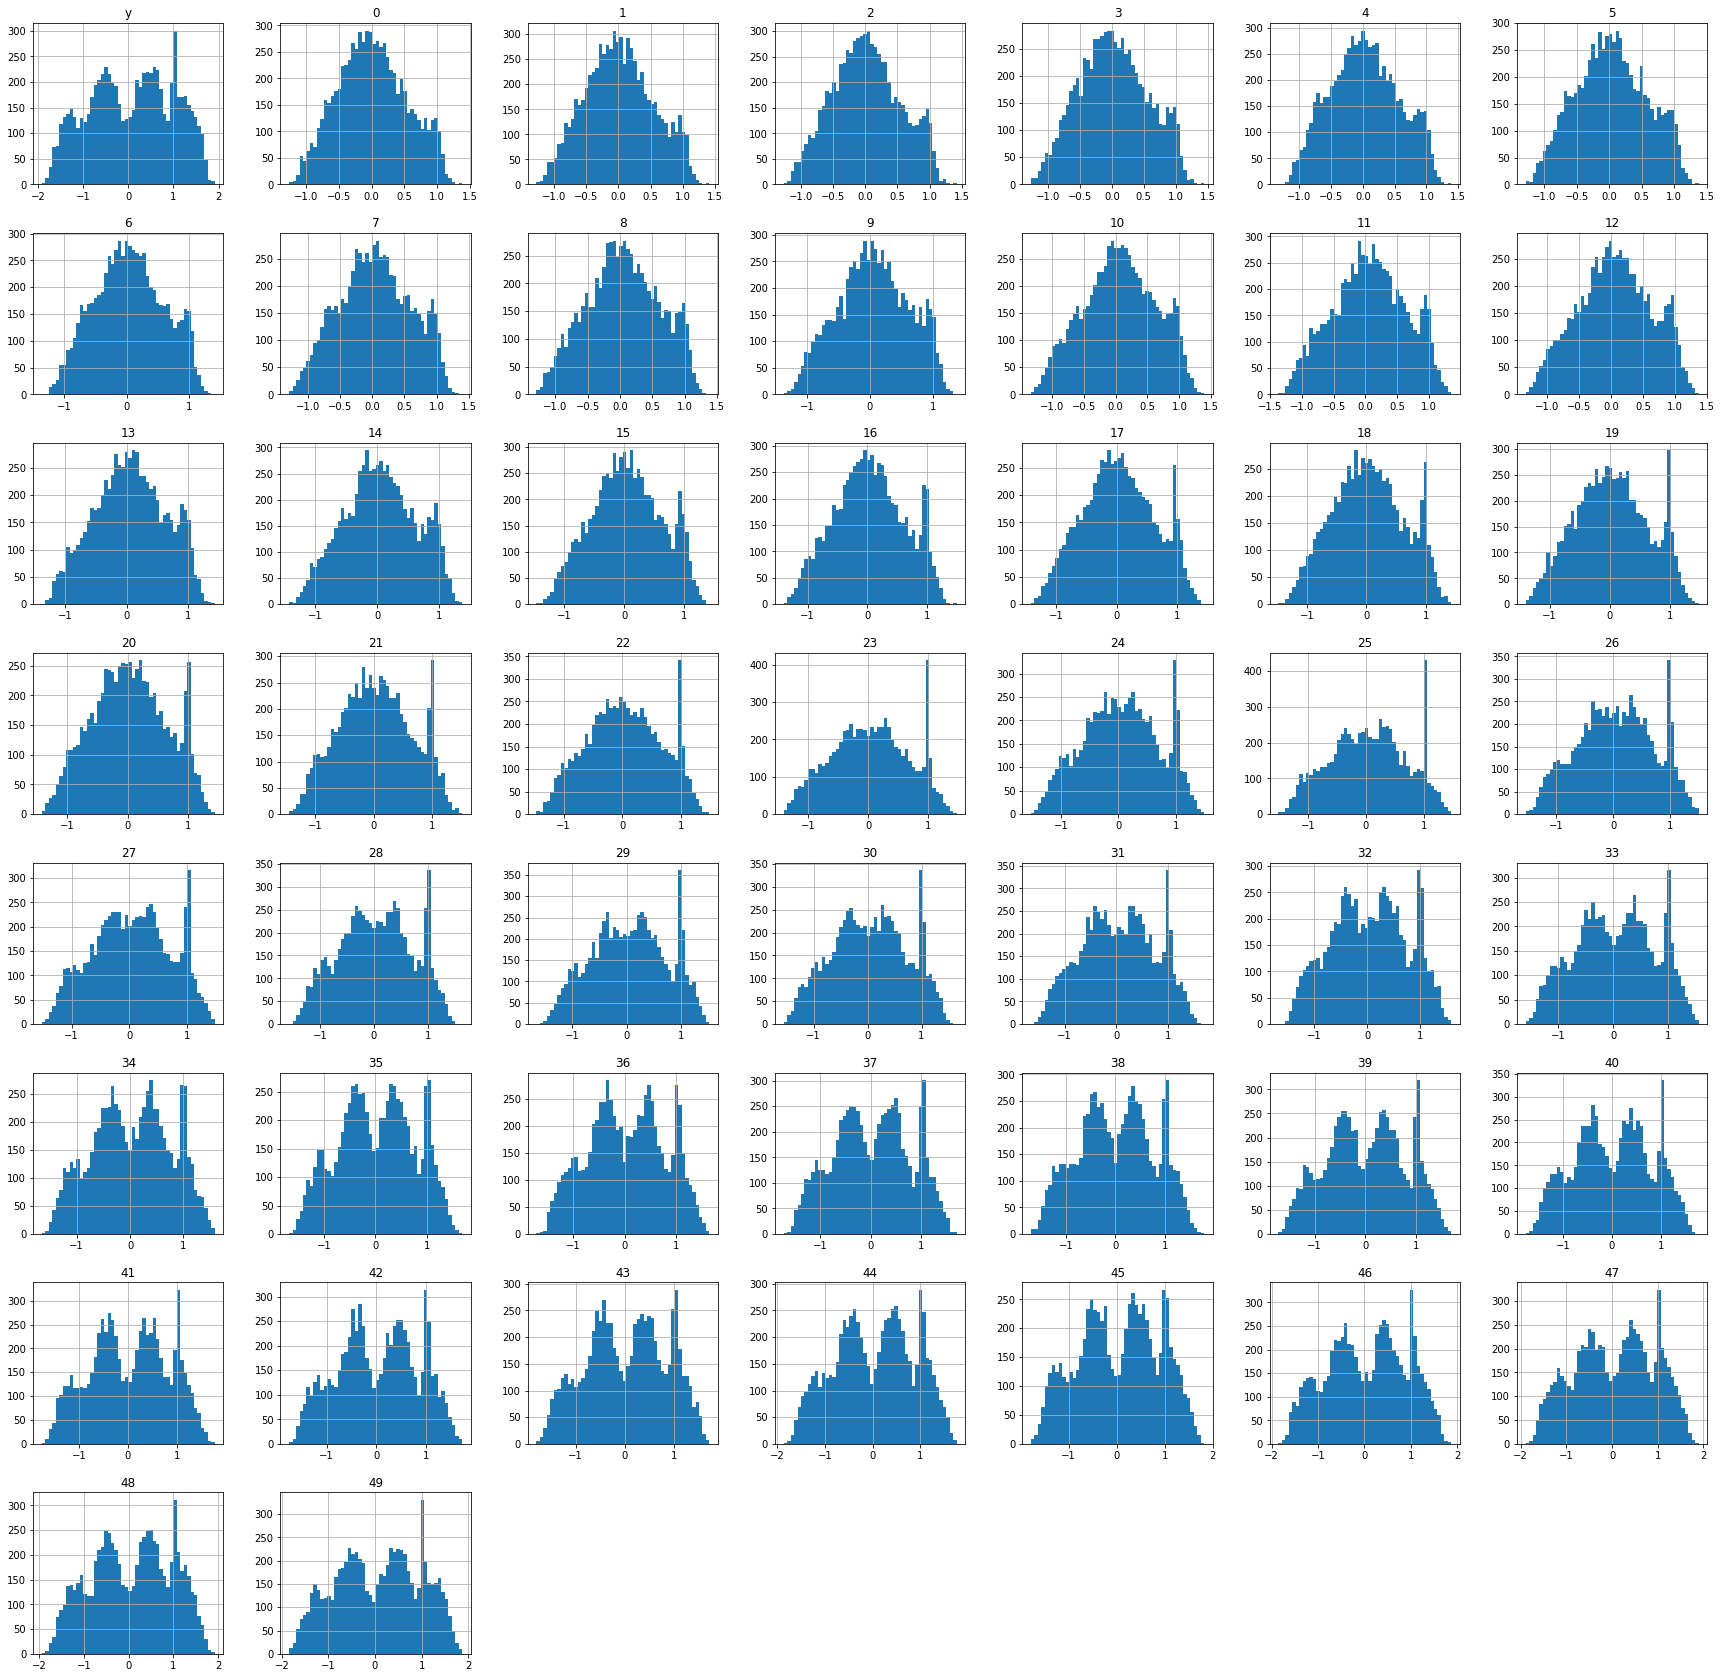

In [18]:
financial_train.hist(bins=50, figsize=(30,30))
plt.show()

### Data Preparation

We now use `StandardScaler` from `sklearn.preprocessing` to standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as: $z = \frac{x-\mu}{\sigma}$

where $\mu$ is the mean of the training samples and $\sigma$ is the standard deviation of the training samples. Then it's printed the first element of the standardized training set that is `fin_train_tr`

In [19]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#print(scaler.fit(financial_train))
#print(scaler.transform(financial_train))
fin_train_tr = pd.DataFrame(scaler.fit_transform(financial_train))

#fin_train_tr.head()

And we can check the structure of `fin_train_tr` by looking at its shape

In [20]:
fin_train_tr.shape

(7326, 51)

### Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fin_train_tr,test_size=0.2,random_state=40)

train_set_features = train_set.drop([0], axis =1)
train_set_targets = train_set[0]

### Linear Regression


Now, the data prepared before are fitted into the linear regression

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(train_set_features,train_set_targets) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

and the coefficients obtained regressing are printed

In [23]:
lin_reg.coef_

array([-3.85327481e-02, -2.13185137e-02,  2.94062007e-03,  3.99714823e-03,
        7.68857322e-03,  4.28506549e-03, -2.74351676e-02, -9.94729652e-04,
       -1.58521265e-02, -6.20880004e-03, -1.16677831e-02,  1.44318608e-02,
       -9.95634093e-03, -1.64858430e-03,  1.39945085e-02, -1.71060405e-02,
        3.68704125e-03, -5.83617702e-03,  2.93781063e-02,  2.79290434e-02,
        2.36986499e-02,  3.53350258e-02,  4.60686579e-03,  4.25972334e-03,
        1.73774402e-02,  9.02387495e-03,  1.77086030e-02,  4.28066088e-02,
        5.37943454e-02,  2.15126551e-02, -6.45894351e-03,  7.11022744e-04,
        4.19033187e-03,  2.05114781e-02,  5.95129298e-02,  6.94893989e-02,
        5.14702631e-02, -2.33385249e-02, -4.79341408e-02, -6.59879997e-02,
       -7.65239899e-04,  3.67625702e-02,  5.94666495e-02,  2.87991584e-02,
       -6.27419063e-03, -1.37474983e-01, -1.89821155e-01, -6.14575902e-02,
        2.62431453e-01,  7.79222121e-01])

### Error Evaluation

We firstly compute the MSE

In [24]:
from sklearn.metrics import mean_squared_error

test_set_features = test_set.drop([0], axis=1)
test_set_targets = test_set[0]

predictions = lin_reg.predict(test_set_features)
lin_mse=mean_squared_error(test_set_targets, predictions)
lin_mse

0.027527395107276722

and then MAE

In [25]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_set_targets,predictions)
lin_mae

0.1334700877629156

### Alternative Model Specification


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models=dict()

models["Support Vector Machine Regressor"]=SVR()
models["Gradient Boosting Regressor"]=GradientBoostingRegressor()
models["XGBoost Regressor"]=XGBRegressor(objective ='reg:squarederror')
models["RandomForestRegressor"]=RandomForestRegressor()
models["Stochastic Gradient Descent"]=SGDRegressor()
models["K-Nearest Neighbours Regressor"]=KNeighborsRegressor()

for model in models:
    model_inuse=models[model].fit(train_set_features,train_set_targets)
    prediction=model_inuse.predict(test_set_features)
    print(f"{model}:{mean_squared_error(test_set_targets,prediction)}")

Support Vector Machine Regressor:0.021816756978033817
Gradient Boosting Regressor:0.028630600346160023
XGBoost Regressor:0.028597322863024355
RandomForestRegressor:0.026603789376100393
Stochastic Gradient Descent:0.028769777460477475
K-Nearest Neighbours Regressor:0.03906336208377472


As we can see from the MSEs, SVR seems to have a lower loss if compared to the other regressors, so we expand the aforementioned model.

In [ ]:
svr_reg=SVR(kernel="rbf", C=1.2, epsilon=0.1)
svr_reg.fit(train_set_features, train_set_targets)

SVR(C=1.2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

We can now predict the values for the test in order to compute the error.

In [ ]:
predictions_svr=svr_reg.predict(test_set_features)

We can now compute the mean squared error

In [ ]:
svr_error=mean_squared_error(test_set_targets,predictions_svr)
svr_error

0.021693131552361085

With hyperparameter optimization and grid search in particular we can try different combinations of parameters and see which one leads to a better performance.

*This may take a while!*

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}
grid=GridSearchCV(SVR(),param_grid, refit=True, verbose=2)
grid.fit(train_set_features, train_set_targets)

Let's now see which are the best parameters among the ones we included

In [ ]:
grid.best_params_

### LSTM with Tensorflow and Keras

In [ ]:
financial_train = train.drop("y", axis=1) # drop labels for training 
y=train["y"].copy()
financial_train2 = financial_train.drop("w", axis=1)
labels = np.array(y)

`MinMaxScaler` is imported from `sklearn.preprocessing` to scale the train set according to the formula:
$X'_i = \frac{X_i-X_{min}}{X_{max}-X_{min}}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
fin_array = scaler.fit_transform(financial_train2)

We now transform data to the correct shape for the algorithm

In [ ]:
features_set = np.reshape(fin_array, ( fin_array.shape[0],fin_array.shape[1],1))
features_set.shape

(7326, 50, 1)

From `keras` are imported the functions needed

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, RepeatVector, LSTM, GRU, Dropout
from keras.callbacks import EarlyStopping

We now define the function `early_stopping` which is a callback function that will allow us to stop training the model to avoid overfitting. The parameters consist of:
- monitor: Quantity to be monitored.
- min_delta: Minimum change in the monitored quantity to qualify as an improvement
- patience: Number of epochs with no improvement after which training will be stopped.
- restore_best_weights: allow to restore model weights from the epoch with the best value of the monitored quantity

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss",
    min_delta=0.004, 
    patience=10, 
    restore_best_weights=True,
)

In this cell are implemeted all the steps needed to find the best hyperparametes for the model.
First we create a function that builds the model which is structured in the same way as the one in the previous cell. 
Then we define the parameters and their range, that we want to test using the `GridSearchCV` function.

*This may take a while to complete!*

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

u = 50

def build_classifier(optimizer):
    model = Sequential()
    model.add(LSTM(units=u, return_sequences="True" ,input_shape=(features_set.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=u, return_sequences="True" ,input_shape=(features_set.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=u, input_shape=(features_set.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss = 'mse', metrics = ['mean_squared_error'])
    return model

model = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size' : [28,30,32],#,28,30,32], #40, 43, 45, 50
              'epochs' : [100,200],
              'optimizer' : ['adam', 'Adadelta'], #'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl'],
              'verbose': [1]}

grid_search  = GridSearchCV(estimator = model,
                            param_grid = parameters,
                            scoring = 'neg_mean_squared_error',
                            cv = 2)


grid_search = grid_search.fit(features_set,labels)

Once we have obtained the best hyperparameters we print them

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_parameters

{'batch_size': 25, 'epochs': 70, 'optimizer': 'adam', 'verbose': 2}

We now start to build the model: we set it up so that it consists of three layers, with first two returning the sequences to the next ones. Dropouts with a $20\%$ rate are added in order to prevent overfitting. We chose the number of layers by progressively adding more and checking the performance of the model. As optimizer we used `adam` which resulted from the hyperparameters optimization that has been performed before. 

In [ ]:
model = Sequential()

model.add(LSTM(units=55, return_sequences="True",input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=55, return_sequences="True",input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=55, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

And now we fit the data that have been prepared into the model.
(Sometimes) By fitting the model multiple times we achieve better results.

In [ ]:
#n = 1
#for i in range(n):
model.fit(features_set, labels, epochs = 100, validation_split=0.1, batch_size = 28, verbose=2,  callbacks=[early_stopping])

Epoch 1/100
228/228 - 6s - loss: 0.2314 - val_loss: 0.1026
Epoch 2/100
228/228 - 2s - loss: 0.1204 - val_loss: 0.0928
Epoch 3/100
228/228 - 2s - loss: 0.1027 - val_loss: 0.1762
Epoch 4/100
228/228 - 2s - loss: 0.0892 - val_loss: 0.1242
Epoch 5/100
228/228 - 2s - loss: 0.0794 - val_loss: 0.0802
Epoch 6/100
228/228 - 2s - loss: 0.0741 - val_loss: 0.0778
Epoch 7/100
228/228 - 2s - loss: 0.0706 - val_loss: 0.0563
Epoch 8/100
228/228 - 2s - loss: 0.0597 - val_loss: 0.0754
Epoch 9/100
228/228 - 2s - loss: 0.0529 - val_loss: 0.0496
Epoch 10/100
228/228 - 2s - loss: 0.0442 - val_loss: 0.0525
Epoch 11/100
228/228 - 2s - loss: 0.0405 - val_loss: 0.0628
Epoch 12/100
228/228 - 2s - loss: 0.0368 - val_loss: 0.0563
Epoch 13/100
228/228 - 2s - loss: 0.0354 - val_loss: 0.0555
Epoch 14/100
228/228 - 2s - loss: 0.0352 - val_loss: 0.0367
Epoch 15/100
228/228 - 2s - loss: 0.0331 - val_loss: 0.0365
Epoch 16/100
228/228 - 2s - loss: 0.0318 - val_loss: 0.0377
Epoch 17/100
228/228 - 2s - loss: 0.0313 - val_lo

We re-apply the same transformations applied before but now on the test set

In [ ]:
test_scaled=scaler.transform(test)
test_scaled

array([[0.2234717 , 0.16163201, 0.20019499, ..., 0.42314219, 0.39647356,
        0.38653022],
       [0.54778469, 0.53651845, 0.59138859, ..., 0.64188457, 0.57389185,
        0.54498805],
       [0.81151686, 0.75810207, 0.75106067, ..., 0.7945658 , 0.83358227,
        0.91174531],
       ...,
       [0.96338652, 0.95140427, 0.94364447, ..., 0.76946144, 0.76684189,
        0.77329558],
       [0.78042029, 0.78092329, 0.77810149, ..., 0.79887116, 0.79436882,
        0.79631411],
       [0.87834256, 0.87097847, 0.86740449, ..., 0.79194238, 0.78574633,
        0.7925877 ]])

In [ ]:
test_features = np.reshape(test_scaled, (-1, test_scaled.shape[1], 1))
test_features.shape

(3141, 50, 1)

Finally we can apply the trained model using the `.predict` module to the re-shaped test set and then we print the first 5 predictions

In [ ]:
predictions = model.predict(test_features)
predictions

array([[-0.6401291 ],
       [ 0.37648785],
       [ 1.634908  ],
       ...,
       [ 1.09753   ],
       [ 0.9398639 ],
       [ 1.1545457 ]], dtype=float32)

We save the output in a txt file so that it can be uploaded to the platform. 

In [ ]:
np.savetxt("submissions23.txt", predictions,delimiter = ",")

-----------------